<a href="https://colab.research.google.com/github/brmu22/Rekonize/blob/main/rekonize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Please be sure to go to Runtime < Change Runtime Type < Select "GPU" .. THIS IS REQUIRED FOR CODE TO RUN CORRECTLY !!

# You can either run each cell individually OR select Runtime < Run All

# **Loading Libraries...**

In [ ]:
!pip3 install face_recognition
!pip3 install fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=98b88bf4857c525de28cf4813cd5a18fc9036cef8f03204e935650d61594066b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 812 kB 14.1 MB/s 
     |████████████████████████████████| 2.3 MB 51.5 MB/s 


## **Upload Any Image...**

In [ ]:
uploaded = files.upload() #upload any desired image here ... BE AWARE: ANY IMAGES THAT OBSTRUCTS FACE THROWS AN ERROR !!

Saving group_image_2.jpg to group_image_2.jpg


## **Displaying Image...**

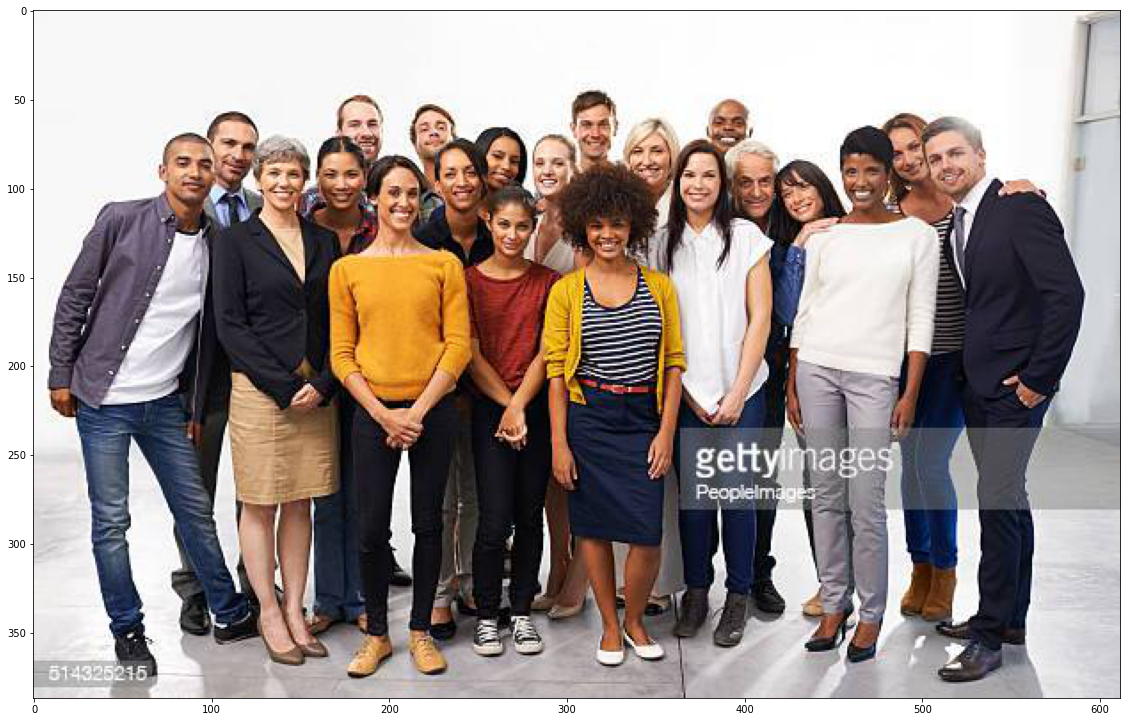

In [ ]:
img = face_recognition.load_image_file(list(uploaded.keys())[0])
boundary = 50
im = PIL.Image.open(list(uploaded.keys())[0])
height = (im.size[1] / im.size[0]) * 20
fig=plt.subplots(figsize=(20,height))
imshow(im)

# **Drawing Borders Around Detected Faces...**

2 Faces Found!
Time Taken to Complete: 0.18438076972961426 seconds


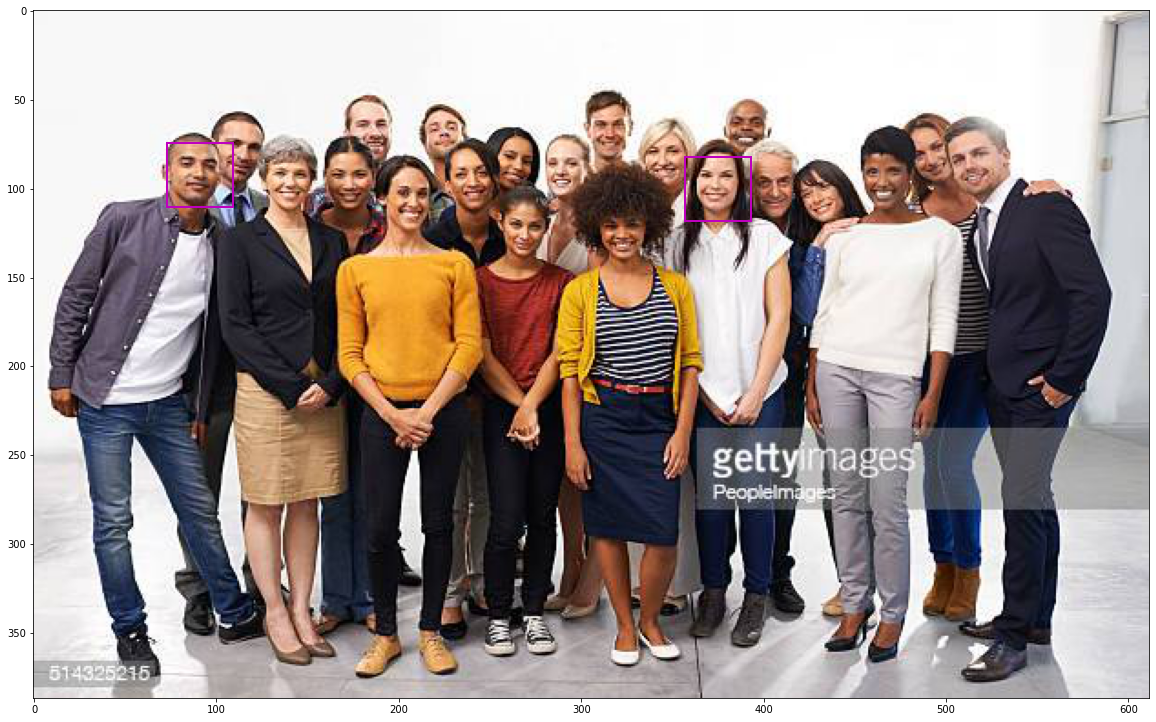

In [ ]:
start = time.time()
face_locations = face_recognition.face_locations(img)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location
    ax.imshow(im,aspect='auto')
    border = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=2,edgecolor='m',facecolor='none')
    ax.add_patch(border)
end = time.time()
if len(face_locations) > 1:
  print(len(face_locations), "Faces Found!")
else:
  print(len(face_locations), "Face Found!")
print("Time Taken to Complete:",end-start,"seconds")

# **Added Feature: Utilizing "Detect Emotion" Library In Order To Sense Emotions**

2 Faces Found!
Time Taken to Complete: 0.199876070022583 seconds


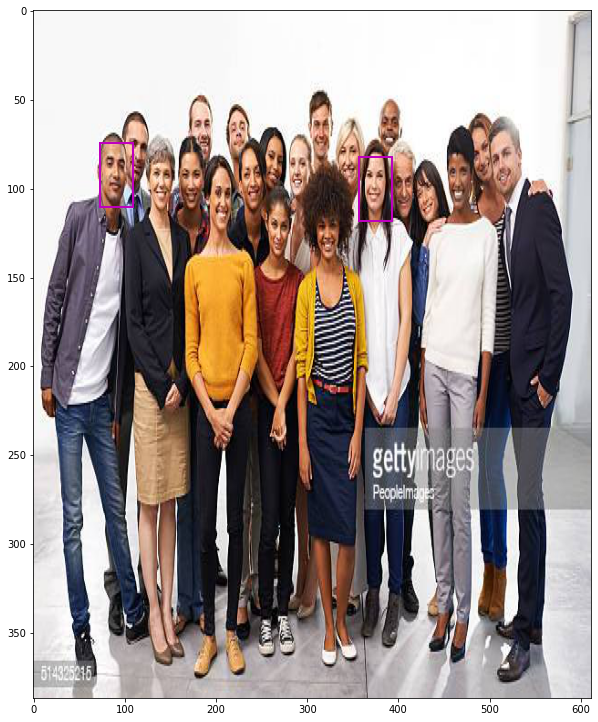

In [ ]:
start = time.time()
face_locations = face_recognition.face_locations(img)
fig,ax = plt.subplots(figsize=(10,height))
for face_location in face_locations:
    top, right, bottom, left = face_location
    ax.imshow(im,aspect='auto')
    border = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=2,edgecolor='m',facecolor='none')
    ax.add_patch(border)
    face_image = img[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      plt.text(left, top, emotion, fontsize=12, bbox=dict(fill=True, edgecolor='black', linewidth=1, facecolor='wheat',  boxstyle='round'))
end = time.time()
if len(face_locations) > 1:
  print(len(face_locations), "Faces Found!")
else:
  print(len(face_locations), "Face Found!")
print("Time Taken to Complete:",end-start,"seconds")